# Student performance - Portuguese

In [1]:
#Import library
import numpy as np
import pandas as pd
import random
from utils import distance, fairness_calculation, generate_data, f_cost, plot_analysis
from experiment import experiment_baseline, run_experiment_baseline, experiment_knapsack, run_experiment_knapsack, experiment_mfc_knapsack, run_experiment_mfc_knapsack,experiment_CPLEX, run_experiment_CPLEX
import matplotlib.pyplot as plt
import math

In [2]:
#data = pd.read_csv('student-por.csv',sep=";")
#url = 'student-por-synthetic.csv'
n_wishes = 5
n_topic = 325 #1/2 data 
#df_generate = generate_data(data,len(data), n_wishes, n_topic,file=url)

In [3]:
df = pd.read_csv('student-por-new-synthetic.csv')

## Heuristic

In [4]:
#Parameters
min_of_min_cap = 2
max_of_min_cap = 18
diff_cap = 1
alpha = 1
beta = 1
protected_att = "sex"
male = 'M'

In [5]:
def balance_score(data,protected_att,male):
    n_student_m = len(data[data[protected_att]==male])
    n_student_f = len(df) - n_student_m
    print("female:",n_student_f)
    print("male:",n_student_m)
    return (min(n_student_f,n_student_m)/max(n_student_f,n_student_m))

In [6]:
balance_score(df,protected_att,male)

female: 383
male: 266


0.6945169712793734

In [7]:
base_curr_min_cap, base_curr_nash, base_curr_satisfied, base_curr_balances, base_curr_capacities , base_curr_n_clusters, base_curr_count_instances, base_curr_tracking = run_experiment_baseline(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)

Time taken for min of capacity 2 : 2.504 seconds.
Time taken for min of capacity 3 : 1.905 seconds.
Time taken for min of capacity 4 : 2.252 seconds.
Time taken for min of capacity 5 : 2.239 seconds.
Time taken for min of capacity 6 : 2.193 seconds.
Time taken for min of capacity 7 : 2.278 seconds.
Time taken for min of capacity 8 : 2.269 seconds.
Time taken for min of capacity 9 : 2.262 seconds.
Time taken for min of capacity 10 : 2.267 seconds.
Time taken for min of capacity 11 : 2.376 seconds.
Time taken for min of capacity 12 : 2.357 seconds.
Time taken for min of capacity 13 : 2.390 seconds.
Time taken for min of capacity 14 : 2.734 seconds.
Time taken for min of capacity 15 : 2.377 seconds.
Time taken for min of capacity 16 : 2.597 seconds.
Time taken for min of capacity 17 : 2.493 seconds.
Time taken for min of capacity 18 : 2.605 seconds.


In [8]:
base_curr_nash_log = [math.log(base_curr_nash[id],base_curr_n_clusters[id]) for id in range(len(base_curr_nash))]

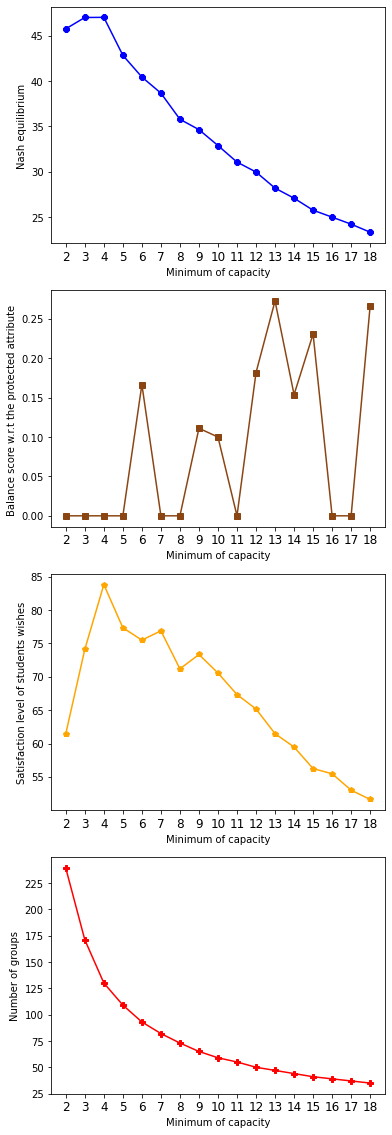

In [9]:
plot_analysis(base_curr_min_cap, base_curr_nash_log, base_curr_balances, base_curr_satisfied, base_curr_n_clusters, step_size=1, file_name = 'Student-mat-Baseline_nash_balance_satisfied_wish_3_topic_100.pdf')

## Baseline CPLEX

In [10]:
dataname = 'student-por'
base_cplex_curr_min_cap, base_cplex_curr_nash, base_cplex_curr_satisfied, base_cplex_curr_balances, base_cplex_curr_capacities , base_cplex_curr_n_clusters, base_cplex_curr_count_instances, base_cplex_curr_tracking = run_experiment_CPLEX(dataname,df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)
base_cplex_curr_nash_log = [math.log(base_cplex_curr_nash[id],base_cplex_curr_n_clusters[id]) if base_cplex_curr_n_clusters[id]>1 else np.nan for id in range(len(base_cplex_curr_nash))]

Time taken for min of capacity 2 : 1.685 seconds.
Time taken for min of capacity 3 : 1.513 seconds.
Time taken for min of capacity 4 : 1.761 seconds.
Time taken for min of capacity 5 : 1.675 seconds.
Time taken for min of capacity 6 : 1.634 seconds.
Time taken for min of capacity 7 : 1.678 seconds.
Time taken for min of capacity 8 : 1.965 seconds.
Time taken for min of capacity 9 : 1.944 seconds.
Time taken for min of capacity 10 : 11.920 seconds.
Time taken for min of capacity 11 : 10.778 seconds.
Time taken for min of capacity 12 : 8.947 seconds.
Time taken for min of capacity 13 : 7.849 seconds.
Time taken for min of capacity 14 : 5.302 seconds.
Time taken for min of capacity 15 : 3.433 seconds.
Time taken for min of capacity 16 : 2.970 seconds.
Time taken for min of capacity 17 : 2.282 seconds.
Time taken for min of capacity 18 : 1.963 seconds.


## Knapsack

In [11]:
knapsack_curr_min_cap, knapsack_curr_nash, knapsack_curr_satisfied, knapsack_curr_balances, knapsack_curr_capacities , knapsack_curr_n_clusters, knapsack_curr_count_instances, knapsack_curr_tracking = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = 1, beta = 1, verbose = True)

Time taken for min of capacity 2 : 2.498 seconds.
Time taken for min of capacity 3 : 2.359 seconds.
Time taken for min of capacity 4 : 2.342 seconds.
Time taken for min of capacity 5 : 2.324 seconds.
Time taken for min of capacity 6 : 2.296 seconds.
Time taken for min of capacity 7 : 2.324 seconds.
Time taken for min of capacity 8 : 2.599 seconds.
Time taken for min of capacity 9 : 2.607 seconds.
Time taken for min of capacity 10 : 2.836 seconds.
Time taken for min of capacity 11 : 2.642 seconds.
Time taken for min of capacity 12 : 2.730 seconds.
Time taken for min of capacity 13 : 2.900 seconds.
Time taken for min of capacity 14 : 3.052 seconds.
Time taken for min of capacity 15 : 3.046 seconds.
Time taken for min of capacity 16 : 3.168 seconds.
Time taken for min of capacity 17 : 3.172 seconds.
Time taken for min of capacity 18 : 3.493 seconds.


In [12]:
knapsack_curr_nash_log = [math.log(knapsack_curr_nash[id],knapsack_curr_n_clusters[id]) for id in range(len(knapsack_curr_nash))]

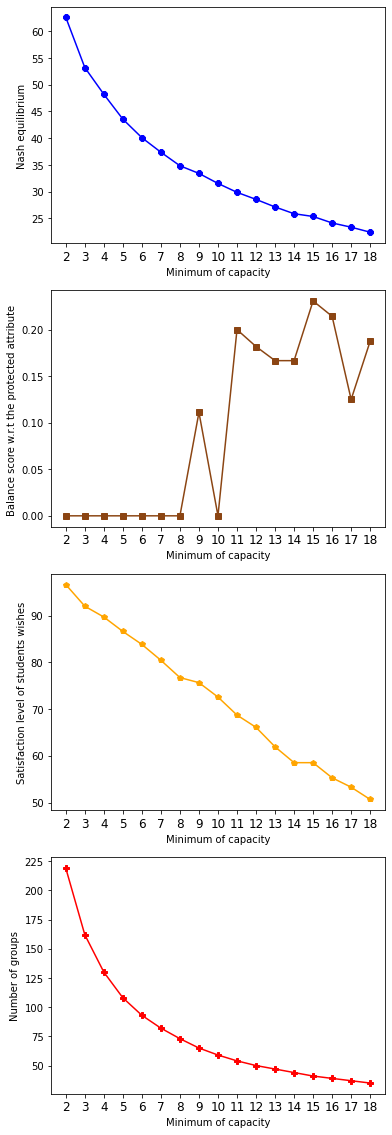

In [13]:
plot_analysis(knapsack_curr_min_cap, knapsack_curr_nash_log, knapsack_curr_balances, knapsack_curr_satisfied, knapsack_curr_n_clusters, step_size=1, file_name = 'Student-mat-Knapsack_nash_balance_satisfied_wish_3_topic_100.pdf')

## MFC knapsack

In [14]:
mfc_knapsack_curr_min_cap, mfc_knapsack_curr_nash, mfc_knapsack_curr_satisfied, mfc_knapsack_curr_balances, mfc_knapsack_curr_capacities , mfc_knapsack_curr_n_clusters, mfc_knapsack_curr_count_instances, mfc_knapsack_curr_tracking = run_experiment_mfc_knapsack(df, n_wishes, n_topic, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',theta = balance_score(df,protected_att,male), alpha = 1, beta = 1,  verbose = True)

female: 383
male: 266
Time taken for min of capacity 2 : 4.715 seconds.
Time taken for min of capacity 3 : 5.121 seconds.
Time taken for min of capacity 4 : 5.570 seconds.
Time taken for min of capacity 5 : 5.693 seconds.
Time taken for min of capacity 6 : 6.719 seconds.
Time taken for min of capacity 7 : 6.962 seconds.
Time taken for min of capacity 8 : 7.448 seconds.
Time taken for min of capacity 9 : 8.211 seconds.
Time taken for min of capacity 10 : 8.392 seconds.
Time taken for min of capacity 11 : 8.262 seconds.
Time taken for min of capacity 12 : 9.102 seconds.
Time taken for min of capacity 13 : 9.889 seconds.
Time taken for min of capacity 14 : 10.229 seconds.
Time taken for min of capacity 15 : 8.524 seconds.
Time taken for min of capacity 16 : 8.701 seconds.
Time taken for min of capacity 17 : 8.632 seconds.
Time taken for min of capacity 18 : 9.462 seconds.


In [15]:
mfc_knapsack_curr_nash_log = [math.log(mfc_knapsack_curr_nash[id],mfc_knapsack_curr_n_clusters[id]) for id in range(len(mfc_knapsack_curr_nash))]

## Comparison plot

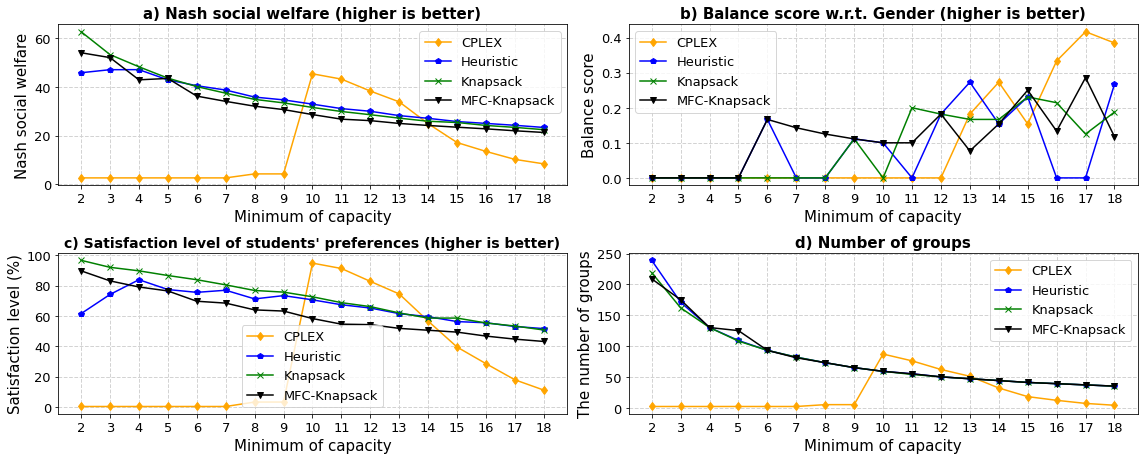

In [16]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6.5)) #(16, 9) before
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium 
ax[0,0].plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax[0,0].plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax[0,0].plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax[0,0].plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,0].yaxis.set_tick_params(labelsize=13)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=13)

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[0,1].plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax[0,1].plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax[0,1].plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax[0,1].plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=13)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=13)

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,0].plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax[1,0].plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax[1,0].plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax[1,0].plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,0].yaxis.set_tick_params(labelsize=13)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14,'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=13)

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,1].plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax[1,1].plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax[1,1].plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax[1,1].plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=13)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=13)
plt.tight_layout()
plt.savefig('Plot_student_por.pdf',bbox_inches='tight')
plt.show()

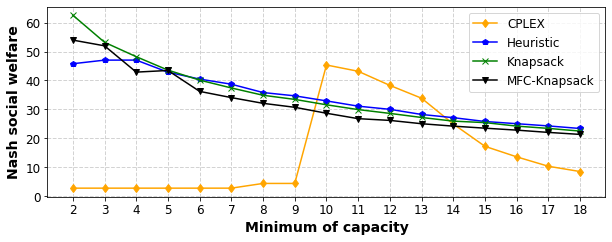

In [17]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) #(16, 9) before
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium 
ax.plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_por.Nash.pdf',bbox_inches='tight')
plt.show()

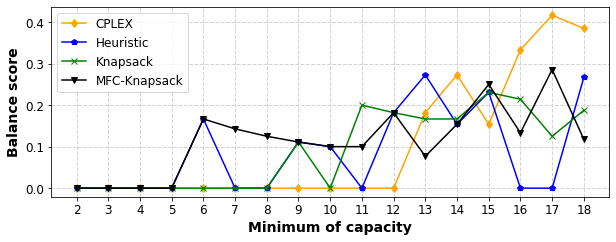

In [18]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) 
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_por.Balance.pdf',bbox_inches='tight')
plt.show()

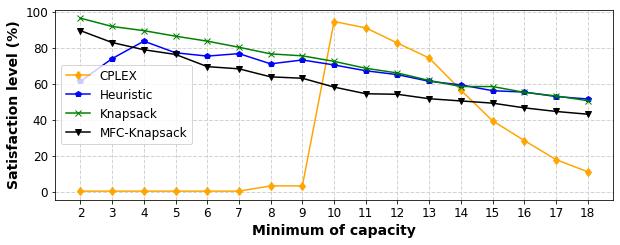

In [19]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) 
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 14,'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12,loc='center left')
plt.savefig('mfc.Plot_student_por.Satisfaction.pdf',bbox_inches='tight')
plt.show()

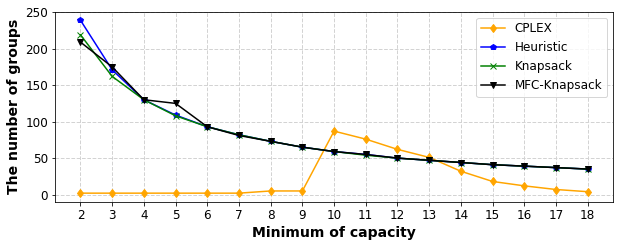

In [20]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5)) 
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig('mfc.Plot_student_por.Number.pdf',bbox_inches='tight')
plt.show()

# Effect of parameters

In [21]:
alpha = 0.1
beta = 1
knapsack_curr_min_cap01, knapsack_curr_nash01, knapsack_curr_satisfied01, knapsack_curr_balances01, knapsack_curr_capacities01 , knapsack_curr_n_clusters01, knapsack_curr_count_instances01, knapsack_curr_tracking01 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log01 = [math.log(knapsack_curr_nash01[id],knapsack_curr_n_clusters01[id]) for id in range(len(knapsack_curr_nash01))]

Time taken for min of capacity 2 : 1.866 seconds.
Time taken for min of capacity 3 : 1.829 seconds.
Time taken for min of capacity 4 : 1.804 seconds.
Time taken for min of capacity 5 : 1.785 seconds.
Time taken for min of capacity 6 : 1.952 seconds.
Time taken for min of capacity 7 : 1.945 seconds.
Time taken for min of capacity 8 : 1.903 seconds.
Time taken for min of capacity 9 : 1.925 seconds.
Time taken for min of capacity 10 : 2.059 seconds.
Time taken for min of capacity 11 : 2.084 seconds.
Time taken for min of capacity 12 : 2.183 seconds.
Time taken for min of capacity 13 : 2.291 seconds.
Time taken for min of capacity 14 : 2.281 seconds.
Time taken for min of capacity 15 : 2.350 seconds.
Time taken for min of capacity 16 : 2.433 seconds.
Time taken for min of capacity 17 : 2.526 seconds.
Time taken for min of capacity 18 : 2.499 seconds.


In [22]:
alpha = 0.5
beta = 1
knapsack_curr_min_cap51, knapsack_curr_nash51, knapsack_curr_satisfied51, knapsack_curr_balances51, knapsack_curr_capacities51 , knapsack_curr_n_clusters51, knapsack_curr_count_instances51, knapsack_curr_tracking51 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log51 = [math.log(knapsack_curr_nash51[id],knapsack_curr_n_clusters51[id]) for id in range(len(knapsack_curr_nash51))]

Time taken for min of capacity 2 : 2.035 seconds.
Time taken for min of capacity 3 : 1.828 seconds.
Time taken for min of capacity 4 : 1.980 seconds.
Time taken for min of capacity 5 : 1.791 seconds.
Time taken for min of capacity 6 : 1.929 seconds.
Time taken for min of capacity 7 : 2.126 seconds.
Time taken for min of capacity 8 : 1.881 seconds.
Time taken for min of capacity 9 : 1.911 seconds.
Time taken for min of capacity 10 : 2.017 seconds.
Time taken for min of capacity 11 : 2.032 seconds.
Time taken for min of capacity 12 : 2.181 seconds.
Time taken for min of capacity 13 : 2.200 seconds.
Time taken for min of capacity 14 : 2.240 seconds.
Time taken for min of capacity 15 : 2.331 seconds.
Time taken for min of capacity 16 : 2.386 seconds.
Time taken for min of capacity 17 : 2.426 seconds.
Time taken for min of capacity 18 : 2.948 seconds.


In [23]:
alpha = 1
beta = 0.1
knapsack_curr_min_cap10, knapsack_curr_nash10, knapsack_curr_satisfied10, knapsack_curr_balances10, knapsack_curr_capacities10 , knapsack_curr_n_clusters10, knapsack_curr_count_instances10, knapsack_curr_tracking10 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log10 = [math.log(knapsack_curr_nash10[id],knapsack_curr_n_clusters10[id]) for id in range(len(knapsack_curr_nash10))]

Time taken for min of capacity 2 : 2.015 seconds.
Time taken for min of capacity 3 : 1.918 seconds.
Time taken for min of capacity 4 : 1.962 seconds.
Time taken for min of capacity 5 : 1.792 seconds.
Time taken for min of capacity 6 : 1.844 seconds.
Time taken for min of capacity 7 : 2.454 seconds.
Time taken for min of capacity 8 : 1.929 seconds.
Time taken for min of capacity 9 : 1.975 seconds.
Time taken for min of capacity 10 : 2.105 seconds.
Time taken for min of capacity 11 : 2.204 seconds.
Time taken for min of capacity 12 : 2.827 seconds.
Time taken for min of capacity 13 : 2.289 seconds.
Time taken for min of capacity 14 : 2.422 seconds.
Time taken for min of capacity 15 : 2.426 seconds.
Time taken for min of capacity 16 : 2.418 seconds.
Time taken for min of capacity 17 : 2.480 seconds.
Time taken for min of capacity 18 : 3.154 seconds.


In [24]:
alpha = 1
beta = 0.5
knapsack_curr_min_cap15, knapsack_curr_nash15, knapsack_curr_satisfied15, knapsack_curr_balances15, knapsack_curr_capacities15 , knapsack_curr_n_clusters15, knapsack_curr_count_instances15, knapsack_curr_tracking15 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log15 = [math.log(knapsack_curr_nash15[id],knapsack_curr_n_clusters15[id]) for id in range(len(knapsack_curr_nash15))]

Time taken for min of capacity 2 : 2.064 seconds.
Time taken for min of capacity 3 : 1.825 seconds.
Time taken for min of capacity 4 : 1.944 seconds.
Time taken for min of capacity 5 : 1.843 seconds.
Time taken for min of capacity 6 : 1.842 seconds.
Time taken for min of capacity 7 : 1.935 seconds.
Time taken for min of capacity 8 : 1.912 seconds.
Time taken for min of capacity 9 : 2.022 seconds.
Time taken for min of capacity 10 : 2.095 seconds.
Time taken for min of capacity 11 : 2.040 seconds.
Time taken for min of capacity 12 : 2.087 seconds.
Time taken for min of capacity 13 : 2.162 seconds.
Time taken for min of capacity 14 : 2.227 seconds.
Time taken for min of capacity 15 : 2.289 seconds.
Time taken for min of capacity 16 : 2.342 seconds.
Time taken for min of capacity 17 : 2.411 seconds.
Time taken for min of capacity 18 : 2.472 seconds.


In [25]:
alpha = 1
beta = 1
knapsack_curr_min_cap11, knapsack_curr_nash11, knapsack_curr_satisfied11, knapsack_curr_balances11, knapsack_curr_capacities11 , knapsack_curr_n_clusters11, knapsack_curr_count_instances11, knapsack_curr_tracking11 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log11 = [math.log(knapsack_curr_nash11[id],knapsack_curr_n_clusters11[id]) for id in range(len(knapsack_curr_nash11))]

Time taken for min of capacity 2 : 1.877 seconds.
Time taken for min of capacity 3 : 1.805 seconds.
Time taken for min of capacity 4 : 1.775 seconds.
Time taken for min of capacity 5 : 1.773 seconds.
Time taken for min of capacity 6 : 1.791 seconds.
Time taken for min of capacity 7 : 1.810 seconds.
Time taken for min of capacity 8 : 1.861 seconds.
Time taken for min of capacity 9 : 1.896 seconds.
Time taken for min of capacity 10 : 1.963 seconds.
Time taken for min of capacity 11 : 1.968 seconds.
Time taken for min of capacity 12 : 2.085 seconds.
Time taken for min of capacity 13 : 2.163 seconds.
Time taken for min of capacity 14 : 2.221 seconds.
Time taken for min of capacity 15 : 2.281 seconds.
Time taken for min of capacity 16 : 2.338 seconds.
Time taken for min of capacity 17 : 2.426 seconds.
Time taken for min of capacity 18 : 2.507 seconds.


In [26]:
alpha = 0.1
beta = 0.1
knapsack_curr_min_cap00, knapsack_curr_nash00, knapsack_curr_satisfied00, knapsack_curr_balances00, knapsack_curr_capacities00 , knapsack_curr_n_clusters00, knapsack_curr_count_instances00, knapsack_curr_tracking00 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log00 = [math.log(knapsack_curr_nash00[id],knapsack_curr_n_clusters00[id]) for id in range(len(knapsack_curr_nash00))]

Time taken for min of capacity 2 : 1.891 seconds.
Time taken for min of capacity 3 : 1.799 seconds.
Time taken for min of capacity 4 : 1.811 seconds.
Time taken for min of capacity 5 : 1.802 seconds.
Time taken for min of capacity 6 : 1.957 seconds.
Time taken for min of capacity 7 : 1.834 seconds.
Time taken for min of capacity 8 : 1.878 seconds.
Time taken for min of capacity 9 : 1.927 seconds.
Time taken for min of capacity 10 : 1.953 seconds.
Time taken for min of capacity 11 : 1.965 seconds.
Time taken for min of capacity 12 : 2.079 seconds.
Time taken for min of capacity 13 : 2.276 seconds.
Time taken for min of capacity 14 : 2.244 seconds.
Time taken for min of capacity 15 : 2.276 seconds.
Time taken for min of capacity 16 : 2.337 seconds.
Time taken for min of capacity 17 : 2.406 seconds.
Time taken for min of capacity 18 : 2.539 seconds.


In [27]:
alpha = 0.5
beta = 0.5
knapsack_curr_min_cap55, knapsack_curr_nash55, knapsack_curr_satisfied55, knapsack_curr_balances55, knapsack_curr_capacities55 , knapsack_curr_n_clusters55, knapsack_curr_count_instances55, knapsack_curr_tracking55 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log55 = [math.log(knapsack_curr_nash55[id],knapsack_curr_n_clusters55[id]) for id in range(len(knapsack_curr_nash55))]

Time taken for min of capacity 2 : 1.882 seconds.
Time taken for min of capacity 3 : 1.829 seconds.
Time taken for min of capacity 4 : 1.795 seconds.
Time taken for min of capacity 5 : 1.780 seconds.
Time taken for min of capacity 6 : 1.805 seconds.
Time taken for min of capacity 7 : 1.843 seconds.
Time taken for min of capacity 8 : 1.896 seconds.
Time taken for min of capacity 9 : 1.929 seconds.
Time taken for min of capacity 10 : 1.970 seconds.
Time taken for min of capacity 11 : 2.051 seconds.
Time taken for min of capacity 12 : 2.085 seconds.
Time taken for min of capacity 13 : 2.183 seconds.
Time taken for min of capacity 14 : 2.279 seconds.
Time taken for min of capacity 15 : 2.267 seconds.
Time taken for min of capacity 16 : 2.372 seconds.
Time taken for min of capacity 17 : 2.417 seconds.
Time taken for min of capacity 18 : 2.644 seconds.


In [28]:
alpha = 0.1
beta = 0.5
knapsack_curr_min_cap05, knapsack_curr_nash05, knapsack_curr_satisfied05, knapsack_curr_balances05, knapsack_curr_capacities05 , knapsack_curr_n_clusters05, knapsack_curr_count_instances05, knapsack_curr_tracking05 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log05 = [math.log(knapsack_curr_nash05[id],knapsack_curr_n_clusters05[id]) for id in range(len(knapsack_curr_nash05))]

Time taken for min of capacity 2 : 1.995 seconds.
Time taken for min of capacity 3 : 1.804 seconds.
Time taken for min of capacity 4 : 1.783 seconds.
Time taken for min of capacity 5 : 1.787 seconds.
Time taken for min of capacity 6 : 1.785 seconds.
Time taken for min of capacity 7 : 1.837 seconds.
Time taken for min of capacity 8 : 1.881 seconds.
Time taken for min of capacity 9 : 1.897 seconds.
Time taken for min of capacity 10 : 1.969 seconds.
Time taken for min of capacity 11 : 2.023 seconds.
Time taken for min of capacity 12 : 2.083 seconds.
Time taken for min of capacity 13 : 2.235 seconds.
Time taken for min of capacity 14 : 2.295 seconds.
Time taken for min of capacity 15 : 2.357 seconds.
Time taken for min of capacity 16 : 2.496 seconds.
Time taken for min of capacity 17 : 2.432 seconds.
Time taken for min of capacity 18 : 2.498 seconds.


In [29]:
alpha = 0.5
beta = 0.1
knapsack_curr_min_cap50, knapsack_curr_nash50, knapsack_curr_satisfied50, knapsack_curr_balances50, knapsack_curr_capacities50 , knapsack_curr_n_clusters50, knapsack_curr_count_instances50, knapsack_curr_tracking50 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log50 = [math.log(knapsack_curr_nash50[id],knapsack_curr_n_clusters50[id]) for id in range(len(knapsack_curr_nash50))]

Time taken for min of capacity 2 : 1.857 seconds.
Time taken for min of capacity 3 : 1.804 seconds.
Time taken for min of capacity 4 : 1.801 seconds.
Time taken for min of capacity 5 : 1.822 seconds.
Time taken for min of capacity 6 : 1.809 seconds.
Time taken for min of capacity 7 : 1.829 seconds.
Time taken for min of capacity 8 : 1.877 seconds.
Time taken for min of capacity 9 : 1.978 seconds.
Time taken for min of capacity 10 : 2.013 seconds.
Time taken for min of capacity 11 : 2.041 seconds.
Time taken for min of capacity 12 : 2.109 seconds.
Time taken for min of capacity 13 : 2.182 seconds.
Time taken for min of capacity 14 : 2.244 seconds.
Time taken for min of capacity 15 : 2.323 seconds.
Time taken for min of capacity 16 : 2.432 seconds.
Time taken for min of capacity 17 : 2.514 seconds.
Time taken for min of capacity 18 : 2.518 seconds.


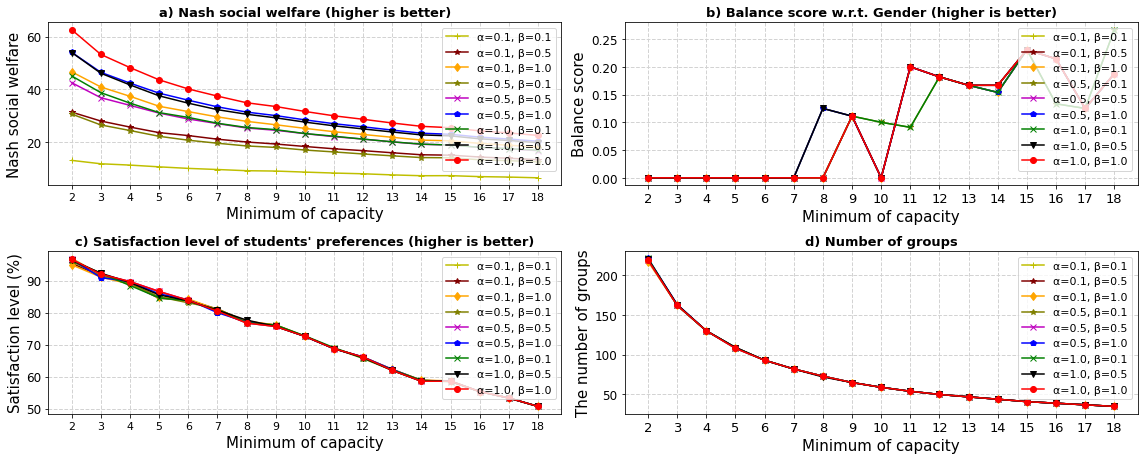

In [30]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6.5))
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax[0,0].plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=11)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=11,loc='upper right')

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[0,1].plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=11,loc='upper right')

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)

ax[1,0].plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=11)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=11,loc='upper right')

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,1].plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=11,loc='upper right')
plt.tight_layout()
file_output_name = 'Plot_student_por_alpha_beta.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

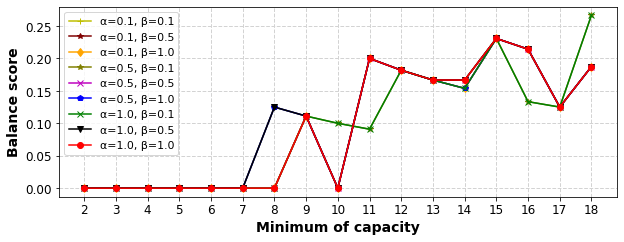

In [31]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper left')
plt.savefig("mfc.Plot_student_por_alpha_beta.Balance.pdf",bbox_inches='tight')
plt.show()

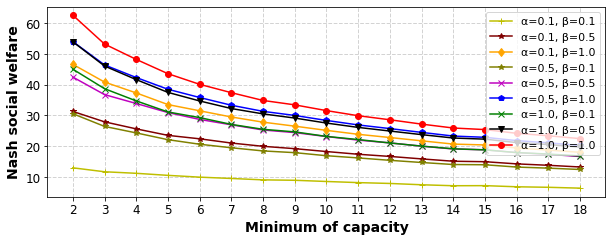

In [32]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax.plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_por_alpha_beta.Nash.pdf",bbox_inches='tight')
plt.show()

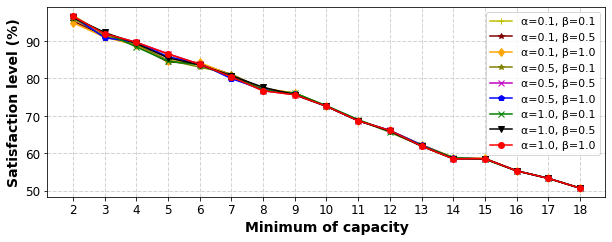

In [33]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)

ax.plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_por_alpha_beta.Satisfaction.pdf",bbox_inches='tight')
plt.show()

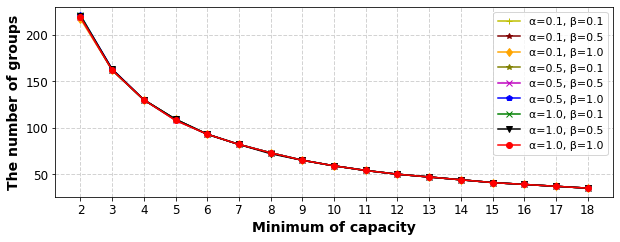

In [34]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5))
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("d) Number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.legend(fontsize=11,loc='upper right')
plt.savefig("mfc.Plot_student_por_alpha_beta.Number.pdf",bbox_inches='tight')
plt.show()